In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract data from local files

Uso pandas para la lectura de datos puesto que son archivos separados por comas y al utilizar el dataset como dataframe me permite realizar algunas operaciones de preprocesamiento con facilidad. Al no tener titulos (cabeceras) los he insertado de forma manual. En la documentación se indica que los valores desconocidos son representados con el simbolo '?', se reemplzaron por valores "nan". 

I use pandas for reading data since they are comma separated files and using the dataset as dataframe allows me to perform some preprocessing operations easily. As they do not have titles (headers) I have inserted them manually. In the documentation it is indicated that the unknown values are represented with the symbol '?', they were replaced by "nan" values.

In [37]:
names=["Age","WorkClass",
        "fnlwgt","education",
        "edu_num","marital_status",
        "occupation","relationship",
        "race","sex","capital_gain",
        "capital_loss","hpweek","native_country","Income"]

data=pd.read_csv("data/adult.data",
                delimiter=',',
                header=None,
                skipinitialspace = True,
                na_values=['?'])
data.columns=names
data.head()

,Age,WorkClass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpweek,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
data_test=pd.read_csv("data/adult.test",
                        delimiter=',',
                        header=None,
                        skiprows=1,
                        skipinitialspace = True,
                        na_values=['?'])
data_test.columns=names
data_test.head()

,Age,WorkClass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpweek,native_country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


# Explore dataset
Necesito verificar algunos aspectos como lo son:
* Valores perdidos o no disponibles
* Proporcion de datos utilizados (clases y variables categoricas)

I need to verify some aspects such as:
* Missing or unavailable values
* Proportion of data used (classes and categorical variables)

In [25]:
data.isnull().sum()

Age                  0
WorkClass         1836
fnlwgt               0
education            0
edu_num              0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hpweek               0
native_country     583
Income               0
dtype: int64

Los valores no disponibles se pueden eliminar o bien rellenar, sin embargo ambas opciones podrian provocar obtener modelos sesgados

Unavailable values can be removed or filled in, but both options may result in biased models.

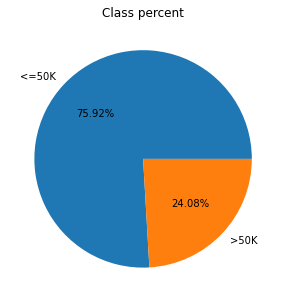

In [26]:
target_ratio=data["Income"].value_counts().to_dict()
plt.figure(figsize=(5,5))
plt.title("Class percent")
plt.pie(x=target_ratio.values(),labels=target_ratio.keys(),autopct='%1.2f%%')
plt.show()

The previous figure show that dataset is unbalanced

Se propone remover las columnas con datos perdidos

It is proposed to remove the columns with missing data.

Age               0
WorkClass         0
fnlwgt            0
education         0
edu_num           0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hpweek            0
native_country    0
Income            0
dtype: int64


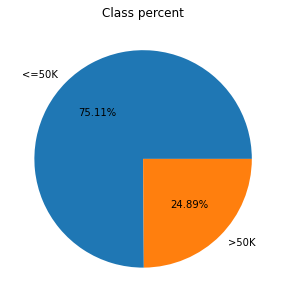

In [27]:
data=data.dropna().reset_index(drop=True)

print(data.isnull().sum())

target_ratio=data["Income"].value_counts().to_dict()
plt.figure(figsize=(5,5))
plt.title("Class percent")
plt.pie(x=target_ratio.values(),labels=target_ratio.keys(),autopct='%1.2f%%')
plt.show()

Esta diferencia de clases se debe considerar en el analisis del modelo.

This class difference must be considered in the analysis of the model.

# Preparing data for model

In [28]:
target=data.pop("Income")
target.replace(["<=50K",">50K"],[0,1])

0        0
1        0
2        0
3        0
4        0
        ..
30157    0
30158    1
30159    0
30160    0
30161    1
Name: Income, Length: 30162, dtype: int64

In [32]:
num_data=data.select_dtypes(include='number')
num_data.head()

,Age,fnlwgt,edu_num,capital_gain,capital_loss,hpweek
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [35]:
num_data.describe()

,Age,fnlwgt,edu_num,capital_gain,capital_loss,hpweek
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
cat_data=data.select_dtypes(exclude='number')
cat_data.head()

,WorkClass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [51]:
cat_data.describe(include='object')

,WorkClass,education,marital_status,occupation,relationship,race,sex,native_country
count,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,9840,14065,4038,12463,25933,20380,27504


Como se puede apreciar en la tabla de arriba, cada variable categorica contiene muchas valores individuales. Considerarlas todas en un modelo podría no ser lo mas conveniente puesto que la distribución de cada valor en cada variable categorica no esta balanceada. Ademas de que se obtendrian dimensiones de entrada muy grandes que no son necesarias. Se propone reducir algunas de estas variables de forma manual.

As can be seen in the table above, each categorical variable contains many individual values. Considering them all in one model may not be the most convenient since the distribution of each value in each categorical variable is not balanced. In addition, this would result in very large input dimensions that probably are not necessary. It is proposed to reduce some of these variables manually.

In [63]:
cat_data["WorkClass"].value_counts().to_frame()


,WorkClass
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14


In [64]:
cat_data["WorkClass"].replace(["Local-gov","State-gov","Federal-gov"],"gov",inplace=True)
cat_data["WorkClass"].value_counts().to_frame()


,WorkClass
Private,22286
gov,4289
Self-emp-not-inc,2499
Self-emp-inc,1074
Without-pay,14


In [66]:
cat_data["education"].value_counts().to_frame()

,education
HS-grad,9840
Some-college,6678
Bachelors,5044
Masters,1627
Assoc-voc,1307
11th,1048
Assoc-acdm,1008
10th,820
7th-8th,557
Prof-school,542
